In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os

df_subway_in_out_path = "drive/MyDrive/Data/Average_Inflow_Outflow_Data.xlsx"
df_subway_in_out = pd.read_excel(df_subway_in_out_path)
df_subway_in_out.head()

,Unnamed: 0,Inflow Average,Outflow Average,IN_RATIO,OUT_RATIO,Unnamed: 5,PRE_INFLOW_TRANS,PRE_INFLOW_TRANS.1,PURE_INFLOW,PURE_OUTFLOW,...,Before_Outflow_ONE_SPACE,Unnamed: 19,After_Inflow_ONE_SPACE,After_Outflow_ONE_SPACE,Unnamed: 22,before_Inflow_congestion,before_Outflow_congestion,Unnamed: 25,after_inflow_congestion,after_outflow_congestion
0,before 06,19799.353414,5954.35743,0.011401,0.003376,NaN,11892.356355,3521.192086,7906.997058,2433.165344,...,9.011723,NaN,22.622797,6.961556,NaN,18.303234,5.632327,NaN,NaN,NaN
1,06 ~ 07,35961.955823,31832.738956,0.020709,0.018048,NaN,21600.321230,18824.732945,14361.634593,13008.006011,...,48.177800,NaN,41.090232,37.217351,NaN,33.244525,30.111125,NaN,NaN,NaN
2,07 ~ 08,107416.080321,86591.004016,0.061856,0.049093,NaN,64518.789012,51206.794624,42897.291309,35384.209392,...,131.052627,NaN,122.733917,101.238155,NaN,99.299285,81.907892,NaN,76.708698,63.273847
3,08 ~ 09,150130.449799,240971.028112,0.086453,0.136619,NaN,90174.904781,142501.569154,59955.545019,98469.458959,...,364.701700,NaN,171.539476,281.732063,NaN,138.785984,227.938562,NaN,107.212173,176.082539
4,09 ~ 10,93809.072289,160794.493976,0.054020,0.091163,NaN,56345.825730,95088.060512,37463.246559,65706.433464,...,243.357161,NaN,107.186511,187.993407,NaN,86.720478,152.098226,NaN,66.991569,117.495879


In [ ]:
df_pure_inflow, df_pure_outflow = df_subway_in_out['PURE_INFLOW'], df_subway_in_out['PURE_OUTFLOW']
df_pure_inflow, df_pure_outflow = df_pure_inflow[:20], df_pure_outflow[:20]
print(df_pure_inflow, df_pure_outflow)

0      7906.997058
1     14361.634593
2     42897.291309
3     59955.545019
4     37463.246559
5     24467.614292
6     24177.267808
7     26239.983333
8     29199.189659
9     29711.951957
10    33821.031852
11    39790.141908
12    55227.408286
13    90698.623785
14    49679.423486
15    36706.060547
16    38007.787355
17    33391.722196
18    16285.733377
19     3519.379757
Name: PURE_INFLOW, dtype: float64 0      2433.165344
1     13008.006011
2     35384.209392
3     98469.458959
4     65706.433464
5     34593.426347
6     29022.293586
7     28517.043779
8     31412.471727
9     30071.713737
10    31637.343019
11    34611.585216
12    44710.972047
13    70332.578033
14    57667.988808
15    31501.409977
16    28335.935936
17    28027.496101
18    17586.724177
19     7728.188114
Name: PURE_OUTFLOW, dtype: float64


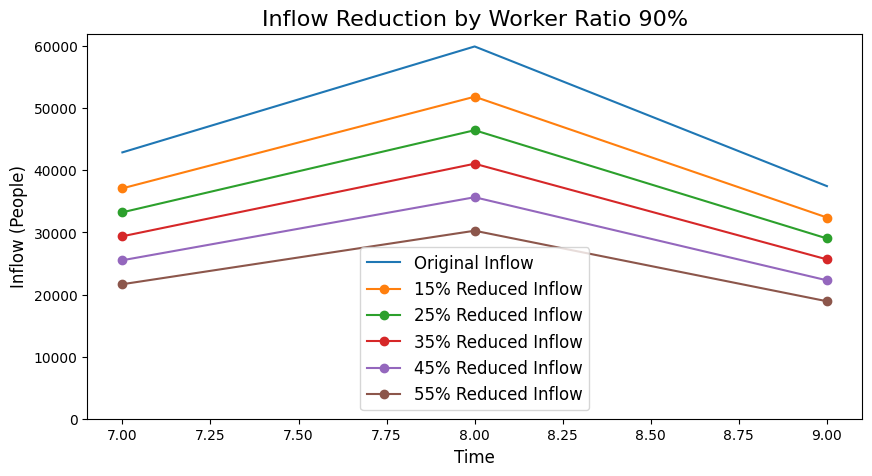

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# 감소량 % (우선 15~55%까지 조사?)
# inflow -> 07~09시의 데이터만 가지고 분석 (가장 혼잡할때만)

inflow_7 = df_pure_inflow[2]
inflow_8 = df_pure_inflow[3]
inflow_9 = df_pure_inflow[4]

# reduce_ratio 설정
reduce_ratios = np.linspace(0.15, 0.55, 5)  # 15% ~ 55%, 10%씩 증가


# 감소량에 따른 reduced_inflow
# 출근시간 근무자는 90%로 가정
def reduced(ratio):
  inflow_reductions = []
  for inflow in [inflow_7, inflow_8, inflow_9]:
      reduced_inflow = inflow - (inflow * ratio)*0.9
      inflow_reductions.append(reduced_inflow)

  plt.plot([7,8,9], inflow_reductions, label=f"{int(ratio*100)}% Reduced Inflow", marker='o')
  return 0

plt.figure(figsize=(10, 5))
plt.plot([7, 8, 9], df_pure_inflow[2:5], label="Original Inflow")
for ratio in reduce_ratios:
  reduce = reduced(ratio)

plt.title("Inflow Reduction by Worker Ratio 90%", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Inflow (People)", fontsize=12)
plt.legend(fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(bottom=0)

plt.show()

**DENSITY 200~350

Density 180: Cumulative Infected = 96


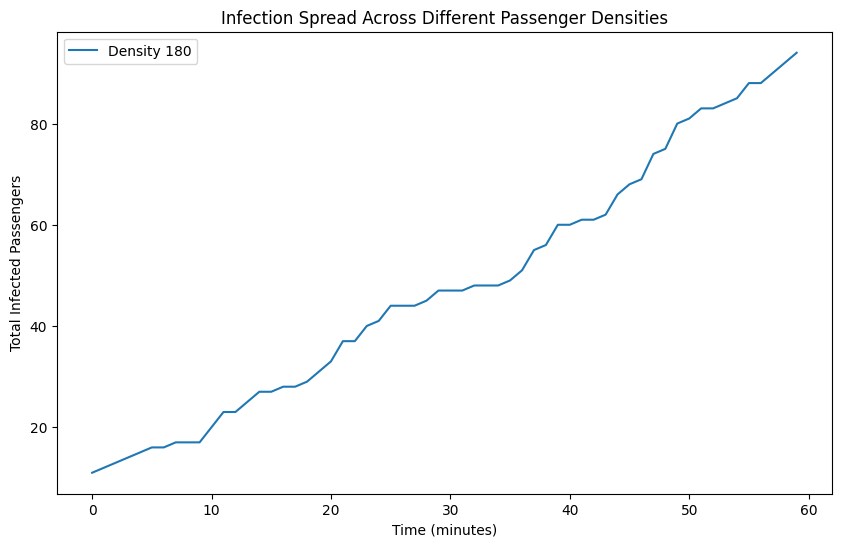

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def infected_rate(density):

    # 열차 및 시뮬레이션 설정
    num_cars = 10  # 열차 칸 수
    passengers_per_car = density  # 한 칸당 평균 승객 수
    initial_infected_probability = 1 / passengers_per_car  # 초기 감염자 비율 (1%)
    base_contact_probability = 0.05  # 거리 1 단위에서의 기본 접촉 빈도
    contact_transmission_probability = 0.1  # 거리 1 단위에서의 접촉당 전염 확률
    simulation_steps = 60  # 시뮬레이션 시간 (분 단위)
    station_intervals = 2  # 역 도착 간격 (분 단위)

    # 열차 칸 크기 (20m x 3m) - 좌석수
    car_length = 19.5  # 세로 길이 (m)
    car_width = 2.33    # 가로 길이 (m)

    # 승객 수 및 2차원 위치 생성
    num_passengers = passengers_per_car
    passenger_positions = np.zeros((num_cars, num_passengers, 2))  # 2차원 좌표

    for car in range(num_cars):
        for i in range(num_passengers):
            passenger_positions[car, i] = [
                np.random.uniform(0, car_length),  # X 좌표 (0 ~ 20m)
                np.random.uniform(0, car_width)   # Y 좌표 (0 ~ 3m)
            ]


    # 거리 계산 (유클리드 거리)
    def calculate_distance(pos1, pos2):
        return np.sqrt((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2)

    # 거리 효과 함수
    def distance_effect(distance):
        if distance == 0:
            return 1
        return 1 / (distance**3)

    # 마스크 착용 변수
    mask_wearing_rate = 0.99  # 마스크 착용률 (99%)
    mask_emission_reduction = 0.75  # 감염자가 배출하는 에어로졸 차단율 (80%)
    mask_inhalation_reduction = 0.55  # 비감염자가 흡입하는 에어로졸 차단율 (50%)

    # 종합 차단 효과 계산
    mask_effectiveness = 1 - (1 - mask_emission_reduction) * (1 - mask_inhalation_reduction)

    # 초기 상태 생성
    train = np.zeros((num_cars, passengers_per_car), dtype=int)  # 0: 비감염, 1: 감염 (전파 가능), 2: 감염(전파 불가능)
    initial_infected_indices = []

    for i in range(num_cars):
        infected_count = int(passengers_per_car * initial_infected_probability)
        infected_indices = np.random.choice(passengers_per_car, infected_count, replace=False)
        train[i, infected_indices] = 1  # 초기 감염자 설정
        initial_infected_indices.append(set(infected_indices))

    # 결과 저장
    infected_counts = []  # 시간에 따른 전체 감염자 수 기록
    cumulative_infected = np.sum(train > 0)  # 누적 확진자 초기화

    for t in range(simulation_steps):
        new_infections = np.zeros_like(train)

        # 감염 확률 계산 시 2차원 거리 사용
        for car in range(num_cars):
            for i in range(num_passengers):
                if train[car, i] == 1:  # 감염자
                    for j in range(num_passengers):
                        if train[car, j] == 0:  # 비감염자
                            distance = calculate_distance(passenger_positions[car, i], passenger_positions[car, j])
                            contact_probability = base_contact_probability * distance_effect(distance)
                            transmission_probability = contact_probability * contact_transmission_probability

                            # 마스크 착용 여부에 따른 확률 감소
                            if np.random.rand() < mask_wearing_rate:  # 비감염자가 마스크 착용
                                transmission_probability *= (1 - mask_emission_reduction)

                            #if np.random.rand() < mask_wearing_rate:  # 감염자가 마스크 착용
                            transmission_probability *= (1 - mask_inhalation_reduction)

                            if np.random.rand() < transmission_probability:
                                new_infections[car, j] = 2

        # 감염 상태 업데이트
        train = np.maximum(train, new_infections)

        # 누적 확진자 업데이트
        cumulative_infected += np.sum(new_infections > 0)

        # 감염자 수 기록
        total_infected = np.sum(train > 0)
        infected_counts.append(total_infected)

        # 역 도착 시 승하차 처리
        if t % station_intervals == 0:
            for car in range(num_cars):
                # 초기 확진자를 제외한 하차 대상 선택
                current_infected_indices = set(np.where(train[car] > 0)[0])
                non_initial_infected_indices = current_infected_indices - initial_infected_indices[car]
                eligible_indices = list(set(range(passengers_per_car)) - non_initial_infected_indices)

                # 하차하는 승객 수
                alight_count = min(len(eligible_indices), np.random.randint(0, int(0.2 * passengers_per_car)))
                alighting_passengers = np.random.choice(eligible_indices, alight_count, replace=False)

                # 하차 후 남아 있는 승객
                remaining_passengers = np.delete(train[car], alighting_passengers)

                # 새로운 승차 승객 수
                new_passenger_count = passengers_per_car - len(remaining_passengers)
                new_passengers = np.zeros(new_passenger_count, dtype=int)
                new_passengers[:int(new_passenger_count * initial_infected_probability)] = 1  # 일부를 감염자로 설정
                np.random.shuffle(new_passengers)

                # 전체 승객 배열 (남은 승객 + 새 승객)
                train[car, :] = np.concatenate((remaining_passengers, new_passengers))

    return infected_counts, cumulative_infected


# 여러 밀도에서 시뮬레이션
densities = range(200, 351, 50)
plt.figure(figsize=(10, 6))

for density in densities:
    infected_counts, cumulative_infected = infected_rate(density)
    plt.plot(range(len(infected_counts)), infected_counts, label=f"Density {density}")
    print(f"Density {density}: Cumulative Infected = {cumulative_infected}")

# 그래프 설정
plt.xlabel("Time (minutes)")
plt.ylabel("Total Infected Passengers")
plt.title("Infection Spread Across Different Passenger Densities")
plt.legend()
plt.show()

**DENSITY BY REMOTE WORK 15%~55%

 WORKER IN SUBWAY 75%

density 324
density 296
density 268
density 241
density 213


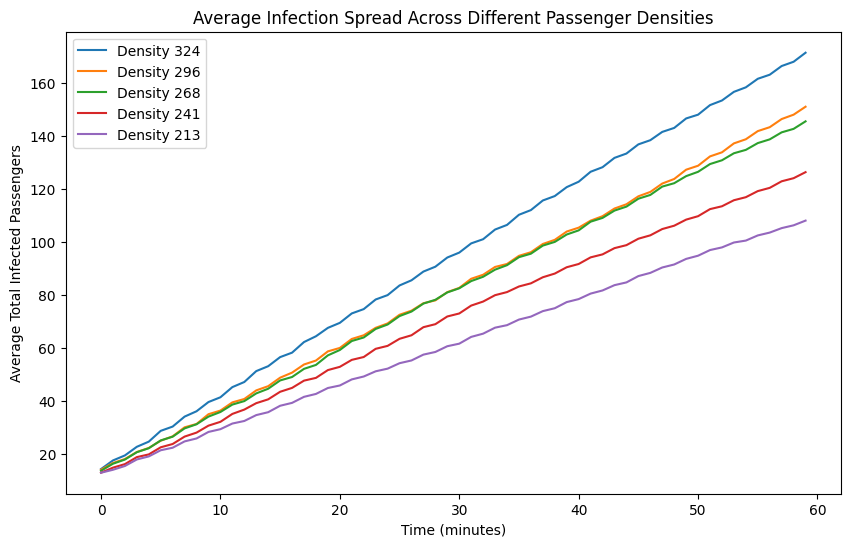

In [ ]:
# 여러 밀도에서 시뮬레이션
densities = [365 - int(370*0.75*0.01*i) for i in range(15, 56, 10)]
num_trials = 54  # 시뮬레이션 시행 횟수

def infected_by_density(time, densities, num_trials):
    # 평균 감염자 수 저장용 리스트
    average_infected_counts = {density: np.zeros(time) for density in densities}  # 30분 동안의 감염자 수 평균

    # 시뮬레이션 시행
    for density in densities:
        print(f'density {density}')
        for trial in range(num_trials):
            if((trial+1) % (num_trials/10) == 0):
                print(f'{(trial+1)/num_trials*100}%')
            infected_counts, cumulative_infected = infected_rate(density)
            average_infected_counts[density] += np.array(infected_counts)

        # 평균 계산
        average_infected_counts[density] /= num_trials

    # 결과 시각화
    plt.figure(figsize=(10, 6))
    for density in densities:
        plt.plot(range(time), average_infected_counts[density], label=f"Density {density}")

    plt.xlabel("Time (minutes)")
    plt.ylabel("Average Total Infected Passengers")
    plt.title("Average Infection Spread Across Different Passenger Densities")
    plt.legend()
    plt.show()

infected_by_density(60, densities, num_trials)

**DENSITY BY REMOTE WORK 15%~55%

WORKER IN SUBWAY 90%

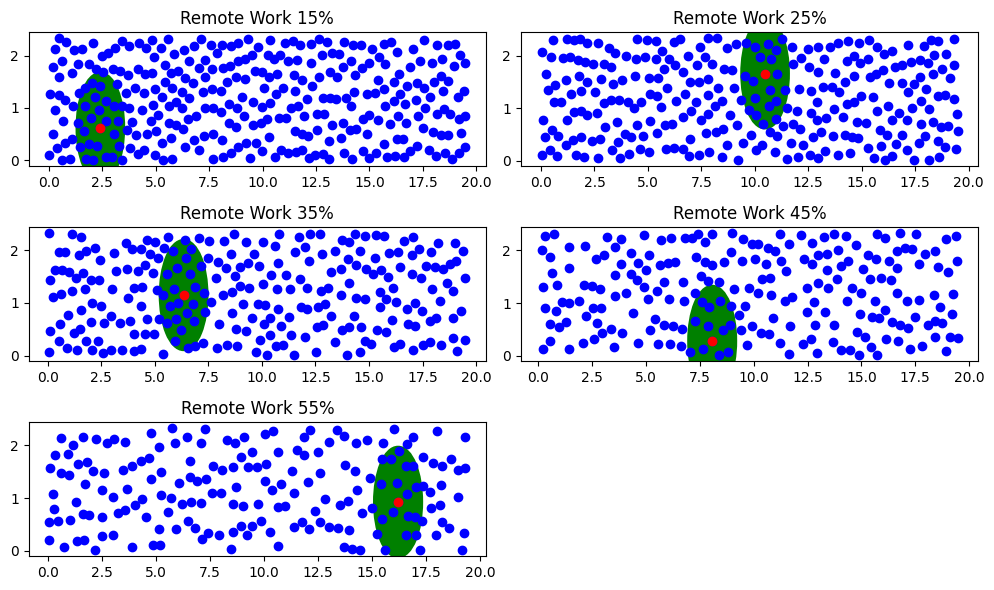

In [ ]:
def infect_rate(d):
  mask_effect = (1-0.75)*(1-0.55)
  if d==0: return 1
  return 0.1 / (d**2) * mask_effect

# 거리 계산 (유클리드 거리)
def calculate_distance(pos1, pos2):
    return np.sqrt((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2)

def position(density):
# 열차 및 시뮬레이션 설정
    num_cars = 10  # 열차 칸 수
    passengers_per_car = density  # 한 칸당 평균 승객 수
    initial_infected_probability = 1 / passengers_per_car  # 초기 감염자 비율 (1%)
    base_contact_probability = 0.05  # 거리 1 단위에서의 기본 접촉 빈도
    contact_transmission_probability = 0.1  # 거리 1 단위에서의 접촉당 전염 확률

    # 열차 칸 크기 (19.5m x 2.33m)
    car_length = 19.5  # 세로 길이 (m)
    car_width = 2.33   # 가로 길이 (m)

    # 승객 수 및 2차원 위치 생성
    num_passengers = passengers_per_car
    passenger_positions = np.zeros((num_cars, num_passengers, 2))  # 2차원 좌표

    for car in range(num_cars):
        for i in range(num_passengers):
            while True:
                # 임의의 위치 생성
                new_position = [
                    np.random.uniform(0, car_length),  # X 좌표 (0 ~ 19.5m)
                    np.random.uniform(0, car_width)   # Y 좌표 (0 ~ 2.33m)
                ]
                # 기존 승객들과 최소 거리 0.3m를 만족하는지 확인
                if i == 0 or all(calculate_distance(new_position, passenger_positions[car, j]) >= 0.3 for j in range(i)):
                    passenger_positions[car, i] = new_position
                    break

    # 초기 상태 생성
    train = np.zeros((num_cars, passengers_per_car), dtype=int)  # 0: 비감염, 1: 감염
    for i in range(num_cars):
        infected_count = int(passengers_per_car * initial_infected_probability)
        infected_indices = np.random.choice(passengers_per_car, infected_count, replace=False)
        train[i, infected_indices] = 1  # 초기 감염자 설정

    return train, passenger_positions

def dist(density):
    train, pos = position(density)
    dist_list = []

    index = [j for j in range(density) if train[i,j] == 1]
    infected_pos = pos[i, index[0]]

    # 거리 1인 원 그리기
    circle = plt.Circle((infected_pos[0], infected_pos[1]), 1, color='green', fill=True, linestyle='-', linewidth=5)
    plt.gca().add_artist(circle)

    for j in range(density):
      new_pos = pos[i,j]
      plt.scatter(new_pos[0], new_pos[1], color='blue')
      dist_list.append(calculate_distance(new_pos, infected_pos))
    plt.scatter(infected_pos[0], infected_pos[1], color='red')

    plt.title(f'Remote Work {int((365-density)/365/0.9*100)+1}%')
    #plt.show()
    return dist_list

plt.figure(figsize = (10,6))
densities = [365 - int(365*0.9*0.01*i) for i in range(15, 56, 10)]
for i, density in enumerate(densities):
    plt.subplot(3,int((len(densities)+2)/3),i+1)
    dist_list = dist(density)
    infected_rates = [infect_rate(dist) for dist in dist_list]

plt.tight_layout()  # 레이아웃 조정
plt.show()

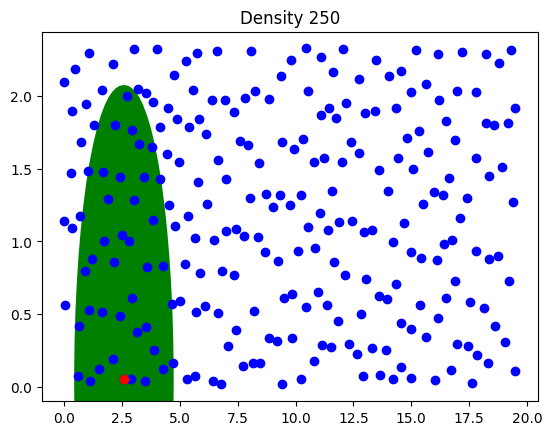

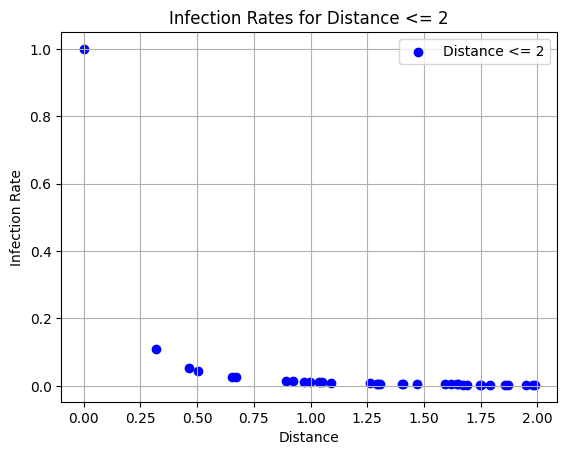

In [ ]:
import numpy as np

density = 250

dist_list = dist(density)
infected_rates = [infect_rate(dist) for dist in dist_list]
plt.show()

# dist_list와 infected_rates를 NumPy 배열로 변환
dist_array = np.array(dist_list)
infected_rates_array = np.array(infected_rates)

# 조건에 맞는 인덱스 선택 (거리 <= 2)
indices = np.where(dist_array <= 2)[0]

# 선택된 데이터로 산점도 생성
plt.scatter(dist_array[indices], infected_rates_array[indices], color='blue', label='Distance <= 2')
plt.xlabel("Distance")
plt.ylabel("Infection Rate")
plt.title("Infection Rates for Distance <= 2")
plt.legend()
plt.grid(True)
plt.show()